In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [6]:
df = pd.read_csv("../data/adult.csv", index_col=0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   marital-status  32561 non-null  object
 4   occupation      32561 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   hours-per-week  32561 non-null  int64 
 9   native-country  32561 non-null  object
 10  salary          32561 non-null  object
 11  salary K$       32561 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 3.2+ MB


In [6]:
df = df.replace("?", np.nan)
df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   education       30162 non-null  object
 3   marital-status  30162 non-null  object
 4   occupation      30162 non-null  object
 5   relationship    30162 non-null  object
 6   race            30162 non-null  object
 7   sex             30162 non-null  object
 8   hours-per-week  30162 non-null  int64 
 9   native-country  30162 non-null  object
 10  salary          30162 non-null  object
 11  salary K$       30162 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [6]:
df.loc[(df['salary K$'] <= 50)  & (df['salary'] == ">50K")]

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$


In [6]:
df.loc[(df['salary K$'] > 50)  & (df['salary'] == "<=50K")]

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$


# Task 1
Print the count of men and women in the dataset.

In [6]:
df[["sex"]].value_counts()

sex   
Male      20380
Female     9782
dtype: int64

# Task 2
Find the average age of men in dataset

In [6]:
pd.DataFrame({
    'Statistic': ['Mean', 'Mode', 'Median'],
    'Age': [
        df[df["sex"] == "Male"]["age"].mean(),
        df[df["sex"] == "Male"]["age"].mode().iloc[0],
        df[df["sex"] == "Male"]["age"].median(),
    ]
})


,Statistic,Age
0,Mean,39.184004
1,Mode,37.000000
2,Median,38.000000


# Task 3
Get the percentage of people from Poland (native-country)

In [6]:
df[df["native-country"] == "Poland"].shape[0] / df.shape[0] * 100

0.18566408063125786

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [6]:
# write your code for task 4 here
df_describe = pd.DataFrame({
    "<=50K": df[df["salary"] == "<=50K"]["age"].describe(),
    "> 50K": df[df["salary"] == ">50K"]["age"].describe(),
})

print(df_describe)

              <=50K        > 50K
count  22654.000000  7508.000000
mean      36.608060    43.959110
std       13.464631    10.269633
min       17.000000    19.000000
25%       26.000000    36.000000
50%       34.000000    43.000000
75%       45.000000    51.000000
max       90.000000    90.000000


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [6]:
# write your code for task 5 here
df[df["salary"] == ">50K"]["education"].value_counts()

Bachelors       2126
HS-grad         1617
Some-college    1336
Masters          918
Prof-school      406
Assoc-voc        344
Doctorate        280
Assoc-acdm       256
10th              59
11th              59
7th-8th           35
12th              29
9th               25
5th-6th           12
1st-4th            6
Name: education, dtype: int64

# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [6]:
# write your code for task 6 here
df.groupby("education")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,820.0,37.897561,16.225795,17.0,23.0,36.0,52.0,90.0
11th,1048.0,32.363550,15.089307,17.0,18.0,28.5,43.0,90.0
12th,377.0,32.013263,14.373710,17.0,19.0,28.0,41.0,79.0
1st-4th,151.0,44.622517,14.929051,19.0,33.0,44.0,56.0,81.0
5th-6th,288.0,41.649306,14.754622,17.0,28.0,41.0,53.0,82.0
7th-8th,557.0,47.631957,15.737479,17.0,34.0,49.0,60.0,90.0
9th,455.0,40.303297,15.335754,17.0,28.0,38.0,53.0,90.0
Assoc-acdm,1008.0,37.286706,10.509755,19.0,29.0,36.0,44.0,90.0
Assoc-voc,1307.0,38.246366,11.181253,19.0,30.0,37.0,45.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [6]:
# write your code for task 7 here
male_salary = df[df["sex"] == "Male"]
pd.pivot_table(male_salary, index="marital-status", columns="salary", aggfunc="size", fill_value=0)

salary,<=50K,>50K
marital-status,,
Divorced,1407,278
Married-AF-spouse,5,4
Married-civ-spouse,6886,5699
Married-spouse-absent,161,20
Never-married,5107,307
Separated,316,49
Widowed,102,39


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [6]:
# write your code for task 8 here
df[df["hours-per-week"] == df["hours-per-week"].max()]["age"].count()

78

# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

<Axes: >

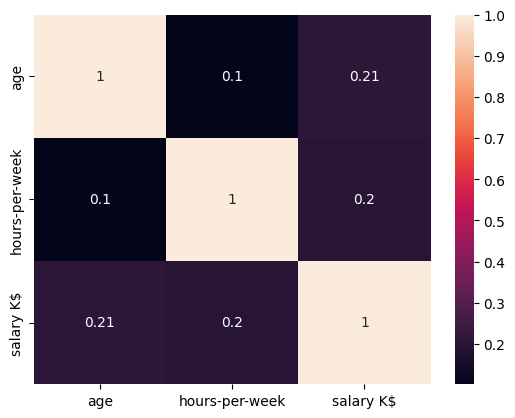

In [6]:
# write your code for task 9 here
sns.heatmap(df.corr(), annot=True)

In [6]:
train=pd.DataFrame()
label=LabelEncoder()
for col in  df.columns:
    if df[col].dtype== 'object':
        train[col]=label.fit_transform(df[col])
    else:
        train[col]=df[col]
        
train.head(3) 

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
0,39,5,9,4,0,1,4,1,40,38,0,39
1,50,4,9,2,3,0,4,1,13,38,0,35
2,38,2,11,0,5,1,4,1,40,38,0,27


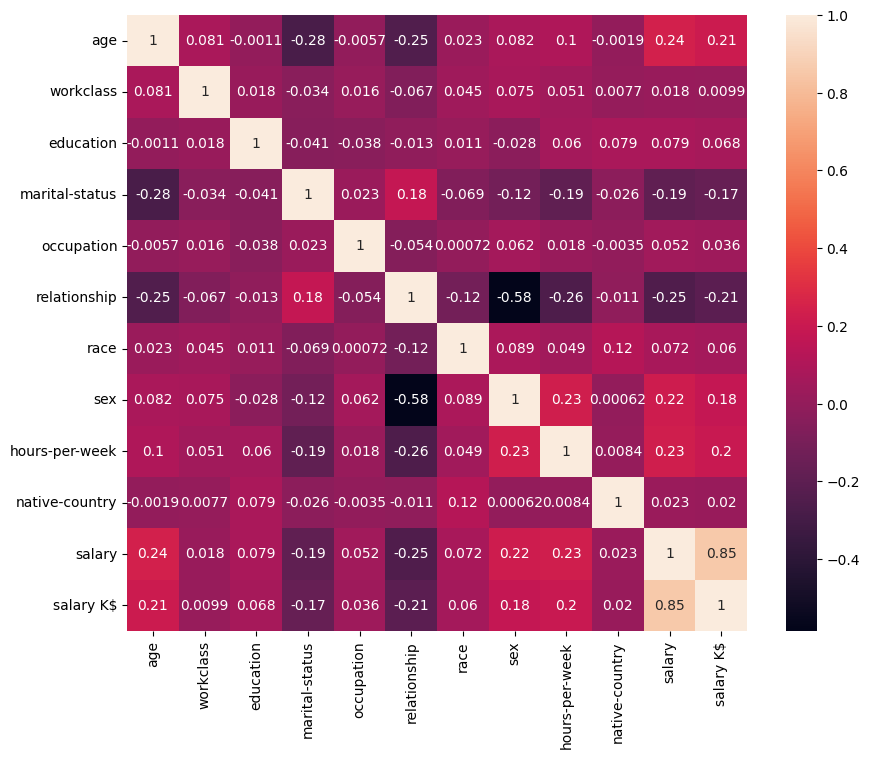

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(), annot=True)

plt.show()